In [1]:
import torch.nn.functional as F
import torch.optim as optim
import torch
import torch.nn as nn
from model import GCN, MLP
from torch.utils.data import DataLoader
from gcn_utils import collate
from utils import get_data, get_data_for_mlp
from tqdm import tqdm



Using backend: pytorch
C:\Users\Yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\dgl\base.py:25: UserWarning: Detected an old version of PyTorch. Suggest using torch>=1.2.0 for the best experience.
  warnings.warn(msg, warn_type)


In [50]:
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from gcn_utils import collate
from utils import get_data
from tqdm import tqdm

train_data = get_data('train_cv/fold_0/train.csv', device='cuda:0')
dev_data = get_data('train_cv/fold_0/dev.csv', device='cuda:0')
data_loader = DataLoader(train_data, batch_size=48, shuffle=True, collate_fn=collate)
_dev_data_loader = DataLoader(dev_data, batch_size=48, shuffle=False, collate_fn=collate)



0it [00:00, ?it/s]

Reading raw data ... : : 0it [00:00, ?it/s]

Reading raw data ... : : 40it [00:00, 397.10it/s]

Reading raw data ... : : 93it [00:00, 428.64it/s]

Reading raw data ... : : 132it [00:00, 413.94it/s]

Reading raw data ... : : 178it [00:00, 425.90it/s]

Reading raw data ... : : 219it [00:00, 418.77it/s]

Reading raw data ... : : 257it [00:00, 402.85it/s]

Reading raw data ... : : 301it [00:00, 412.44it/s]

Reading raw data ... : : 340it [00:00, 348.33it/s]

Reading raw data ... : : 384it [00:00, 370.00it/s]

Reading raw data ... : : 434it [00:01, 400.57it/s]

Reading raw data ... : : 483it [00:01, 421.88it/s]

Reading raw data ... : : 527it [00:01, 422.58it/s]

Reading raw data ... : : 570it [00:01, 418.92it/s]

Reading raw data ... : : 613it [00:01, 416.43it/s]

Reading raw data ... : : 667it [00:01, 446.29it/s]

Reading raw data ... : : 713it [00:01, 442.91it/s]

Reading raw data ... : : 758it [00:01, 430.08it/s]

Reading raw data ... : : 802it [00:01, 398.15it/s]


Extracting Features ...:   2%|█▎                                                     | 41/1694 [00:00<00:35, 47.21it/s]

Extracting Features ...:   2%|█▎                                                     | 41/1694 [00:00<00:35, 47.21it/s]

Extracting Features ...:   2%|█▎                                                     | 41/1694 [00:00<00:35, 47.21it/s]

Extracting Features ...:   2%|█▎                                                     | 41/1694 [00:00<00:35, 47.21it/s]

Extracting Features ...:   2%|█▎                                                     | 41/1694 [00:01<00:35, 47.21it/s]

Extracting Features ...:   2%|█▎                                                     | 41/1694 [00:01<00:35, 47.21it/s]

Extracting Features ...:   3%|█▌                                                     | 49/1694 [00:01<00:31, 51.67it/s]

Extracting Features ...:   3%|█▌                                                     | 49/1694 [00:01<00:31, 51.67it/s]

Extracting Features ...:   3%|█▌

Extracting Features ...:   6%|███▏                                                   | 97/1694 [00:02<00:41, 38.83it/s]

Extracting Features ...:   6%|███▎                                                  | 102/1694 [00:02<00:42, 37.44it/s]

Extracting Features ...:   6%|███▎                                                  | 102/1694 [00:02<00:42, 37.44it/s]

Extracting Features ...:   6%|███▎                                                  | 102/1694 [00:02<00:42, 37.44it/s]

Extracting Features ...:   6%|███▎                                                  | 102/1694 [00:02<00:42, 37.44it/s]

Extracting Features ...:   6%|███▎                                                  | 102/1694 [00:02<00:42, 37.44it/s]

Extracting Features ...:   6%|███▎                                                  | 102/1694 [00:02<00:42, 37.44it/s]

Extracting Features ...:   6%|███▍                                                  | 107/1694 [00:02<00:40, 38.83it/s]

Extracting Features ...:   6%|██

Extracting Features ...:   9%|████▊                                                 | 152/1694 [00:04<00:54, 28.48it/s]

Extracting Features ...:   9%|████▉                                                 | 156/1694 [00:04<00:49, 30.98it/s]

Extracting Features ...:   9%|████▉                                                 | 156/1694 [00:04<00:49, 30.98it/s]

Extracting Features ...:   9%|████▉                                                 | 156/1694 [00:04<00:49, 30.98it/s]

Extracting Features ...:   9%|████▉                                                 | 156/1694 [00:04<00:49, 30.98it/s]

Extracting Features ...:   9%|████▉                                                 | 156/1694 [00:04<00:49, 30.98it/s]

Extracting Features ...:   9%|████▉                                                 | 156/1694 [00:04<00:49, 30.98it/s]

Extracting Features ...:  10%|█████▏                                                | 161/1694 [00:04<00:44, 34.70it/s]

Extracting Features ...:  10%|██

Extracting Features ...:  12%|██████▋                                               | 209/1694 [00:06<00:49, 30.26it/s]

Extracting Features ...:  12%|██████▋                                               | 209/1694 [00:06<00:49, 30.26it/s]

Extracting Features ...:  12%|██████▋                                               | 209/1694 [00:06<00:49, 30.26it/s]

Extracting Features ...:  12%|██████▋                                               | 209/1694 [00:06<00:49, 30.26it/s]

Extracting Features ...:  12%|██████▋                                               | 209/1694 [00:06<00:49, 30.26it/s]

Extracting Features ...:  13%|██████▊                                               | 214/1694 [00:06<00:44, 33.32it/s]

Extracting Features ...:  13%|██████▊                                               | 214/1694 [00:06<00:44, 33.32it/s]

Extracting Features ...:  13%|██████▊                                               | 214/1694 [00:06<00:44, 33.32it/s]

Extracting Features ...:  13%|██

Extracting Features ...:  16%|████████▍                                             | 264/1694 [00:07<00:57, 24.67it/s]

Extracting Features ...:  16%|████████▍                                             | 264/1694 [00:08<00:57, 24.67it/s]

Extracting Features ...:  16%|████████▍                                             | 264/1694 [00:08<00:57, 24.67it/s]

Extracting Features ...:  16%|████████▌                                             | 267/1694 [00:08<00:55, 25.87it/s]

Extracting Features ...:  16%|████████▌                                             | 267/1694 [00:08<00:55, 25.87it/s]

Extracting Features ...:  16%|████████▌                                             | 267/1694 [00:08<00:55, 25.87it/s]

Extracting Features ...:  16%|████████▌                                             | 267/1694 [00:08<00:55, 25.87it/s]

Extracting Features ...:  16%|████████▌                                             | 267/1694 [00:08<00:55, 25.87it/s]

Extracting Features ...:  16%|██

Extracting Features ...:  19%|██████████▏                                           | 319/1694 [00:09<00:33, 41.04it/s]

Extracting Features ...:  19%|██████████▏                                           | 319/1694 [00:09<00:33, 41.04it/s]

Extracting Features ...:  19%|██████████▏                                           | 319/1694 [00:09<00:33, 41.04it/s]

Extracting Features ...:  19%|██████████▏                                           | 319/1694 [00:09<00:33, 41.04it/s]

Extracting Features ...:  19%|██████████▎                                           | 324/1694 [00:09<00:40, 34.17it/s]

Extracting Features ...:  19%|██████████▎                                           | 324/1694 [00:09<00:40, 34.17it/s]

Extracting Features ...:  19%|██████████▎                                           | 324/1694 [00:09<00:40, 34.17it/s]

Extracting Features ...:  19%|██████████▎                                           | 324/1694 [00:09<00:40, 34.17it/s]

Extracting Features ...:  19%|██

Extracting Features ...:  22%|███████████▉                                          | 375/1694 [00:11<00:38, 33.89it/s]

Extracting Features ...:  22%|███████████▉                                          | 375/1694 [00:11<00:38, 33.89it/s]

Extracting Features ...:  22%|███████████▉                                          | 375/1694 [00:11<00:38, 33.89it/s]

Extracting Features ...:  22%|███████████▉                                          | 375/1694 [00:11<00:38, 33.89it/s]

Extracting Features ...:  22%|███████████▉                                          | 375/1694 [00:11<00:38, 33.89it/s]

Extracting Features ...:  22%|████████████                                          | 379/1694 [00:11<00:41, 31.75it/s]

Extracting Features ...:  22%|████████████                                          | 379/1694 [00:11<00:41, 31.75it/s]

Extracting Features ...:  22%|████████████                                          | 379/1694 [00:11<00:41, 31.75it/s]

Extracting Features ...:  22%|██

Extracting Features ...:  25%|█████████████▍                                        | 420/1694 [00:12<00:33, 38.09it/s]

Extracting Features ...:  26%|█████████████▊                                        | 432/1694 [00:12<00:26, 47.24it/s]

Extracting Features ...:  26%|█████████████▊                                        | 432/1694 [00:12<00:26, 47.24it/s]

Extracting Features ...:  26%|█████████████▊                                        | 432/1694 [00:12<00:26, 47.24it/s]

Extracting Features ...:  26%|█████████████▊                                        | 432/1694 [00:12<00:26, 47.24it/s]

Extracting Features ...:  26%|█████████████▊                                        | 432/1694 [00:12<00:26, 47.24it/s]

Extracting Features ...:  26%|█████████████▊                                        | 432/1694 [00:12<00:26, 47.24it/s]

Extracting Features ...:  26%|█████████████▊                                        | 432/1694 [00:12<00:26, 47.24it/s]

Extracting Features ...:  26%|██

Extracting Features ...:  29%|███████████████▍                                      | 486/1694 [00:14<00:29, 41.01it/s]

Extracting Features ...:  29%|███████████████▍                                      | 486/1694 [00:14<00:29, 41.01it/s]

Extracting Features ...:  29%|███████████████▍                                      | 486/1694 [00:14<00:29, 41.01it/s]

Extracting Features ...:  29%|███████████████▋                                      | 492/1694 [00:14<00:31, 37.73it/s]

Extracting Features ...:  29%|███████████████▋                                      | 492/1694 [00:14<00:31, 37.73it/s]

Extracting Features ...:  29%|███████████████▋                                      | 492/1694 [00:14<00:31, 37.73it/s]

Extracting Features ...:  29%|███████████████▋                                      | 492/1694 [00:14<00:31, 37.73it/s]

Extracting Features ...:  29%|███████████████▋                                      | 492/1694 [00:14<00:31, 37.73it/s]

Extracting Features ...:  29%|██

Extracting Features ...:  32%|█████████████████▎                                    | 544/1694 [00:15<00:33, 34.65it/s]

Extracting Features ...:  32%|█████████████████▎                                    | 544/1694 [00:15<00:33, 34.65it/s]

Extracting Features ...:  32%|█████████████████▎                                    | 544/1694 [00:15<00:33, 34.65it/s]

Extracting Features ...:  32%|█████████████████▎                                    | 544/1694 [00:15<00:33, 34.65it/s]

Extracting Features ...:  32%|█████████████████▍                                    | 548/1694 [00:15<00:34, 33.67it/s]

Extracting Features ...:  32%|█████████████████▍                                    | 548/1694 [00:15<00:34, 33.67it/s]

Extracting Features ...:  32%|█████████████████▍                                    | 548/1694 [00:15<00:34, 33.67it/s]

Extracting Features ...:  32%|█████████████████▍                                    | 548/1694 [00:15<00:34, 33.67it/s]

Extracting Features ...:  32%|██

Extracting Features ...:  35%|███████████████████                                   | 597/1694 [00:17<00:47, 23.01it/s]

Extracting Features ...:  35%|███████████████████                                   | 597/1694 [00:17<00:47, 23.01it/s]

Extracting Features ...:  35%|███████████████████▏                                  | 601/1694 [00:17<00:43, 25.14it/s]

Extracting Features ...:  35%|███████████████████▏                                  | 601/1694 [00:17<00:43, 25.14it/s]

Extracting Features ...:  35%|███████████████████▏                                  | 601/1694 [00:17<00:43, 25.14it/s]

Extracting Features ...:  35%|███████████████████▏                                  | 601/1694 [00:17<00:43, 25.14it/s]

Extracting Features ...:  36%|███████████████████▎                                  | 604/1694 [00:17<00:41, 25.97it/s]

Extracting Features ...:  36%|███████████████████▎                                  | 604/1694 [00:17<00:41, 25.97it/s]

Extracting Features ...:  36%|██

Extracting Features ...:  39%|████████████████████▉                                 | 655/1694 [00:18<00:24, 41.89it/s]

Extracting Features ...:  39%|████████████████████▉                                 | 655/1694 [00:18<00:24, 41.89it/s]

Extracting Features ...:  39%|████████████████████▉                                 | 655/1694 [00:18<00:24, 41.89it/s]

Extracting Features ...:  39%|████████████████████▉                                 | 655/1694 [00:18<00:24, 41.89it/s]

Extracting Features ...:  39%|████████████████████▉                                 | 655/1694 [00:19<00:24, 41.89it/s]

Extracting Features ...:  39%|█████████████████████                                 | 660/1694 [00:19<00:25, 39.86it/s]

Extracting Features ...:  39%|█████████████████████                                 | 660/1694 [00:19<00:25, 39.86it/s]

Extracting Features ...:  39%|█████████████████████                                 | 660/1694 [00:19<00:25, 39.86it/s]

Extracting Features ...:  39%|██

Extracting Features ...:  42%|██████████████████████▋                               | 711/1694 [00:20<00:28, 34.20it/s]

Extracting Features ...:  42%|██████████████████████▋                               | 711/1694 [00:20<00:28, 34.20it/s]

Extracting Features ...:  42%|██████████████████████▋                               | 711/1694 [00:20<00:28, 34.20it/s]

Extracting Features ...:  42%|██████████████████████▋                               | 711/1694 [00:20<00:28, 34.20it/s]

Extracting Features ...:  42%|██████████████████████▊                               | 715/1694 [00:20<00:32, 30.34it/s]

Extracting Features ...:  42%|██████████████████████▊                               | 715/1694 [00:20<00:32, 30.34it/s]

Extracting Features ...:  42%|██████████████████████▊                               | 715/1694 [00:20<00:32, 30.34it/s]

Extracting Features ...:  42%|██████████████████████▊                               | 715/1694 [00:20<00:32, 30.34it/s]

Extracting Features ...:  42%|██

Extracting Features ...:  45%|████████████████████████▍                             | 766/1694 [00:22<00:35, 25.93it/s]

Extracting Features ...:  45%|████████████████████████▍                             | 766/1694 [00:22<00:35, 25.93it/s]

Extracting Features ...:  45%|████████████████████████▍                             | 766/1694 [00:22<00:35, 25.93it/s]

Extracting Features ...:  45%|████████████████████████▍                             | 766/1694 [00:22<00:35, 25.93it/s]

Extracting Features ...:  45%|████████████████████████▌                             | 769/1694 [00:22<00:36, 25.15it/s]

Extracting Features ...:  45%|████████████████████████▌                             | 769/1694 [00:22<00:36, 25.15it/s]

Extracting Features ...:  45%|████████████████████████▌                             | 769/1694 [00:22<00:36, 25.15it/s]

Extracting Features ...:  45%|████████████████████████▌                             | 769/1694 [00:22<00:36, 25.15it/s]

Extracting Features ...:  46%|██

Extracting Features ...:  48%|█████████████████████████▉                            | 813/1694 [00:24<00:36, 23.81it/s]

Extracting Features ...:  48%|█████████████████████████▉                            | 813/1694 [00:24<00:36, 23.81it/s]

Extracting Features ...:  49%|██████████████████████████▏                           | 822/1694 [00:24<00:29, 29.72it/s]

Extracting Features ...:  49%|██████████████████████████▏                           | 822/1694 [00:24<00:29, 29.72it/s]

Extracting Features ...:  49%|██████████████████████████▏                           | 822/1694 [00:24<00:29, 29.72it/s]

Extracting Features ...:  49%|██████████████████████████▏                           | 822/1694 [00:24<00:29, 29.72it/s]

Extracting Features ...:  49%|██████████████████████████▏                           | 822/1694 [00:24<00:29, 29.72it/s]

Extracting Features ...:  49%|██████████████████████████▏                           | 822/1694 [00:24<00:29, 29.72it/s]

Extracting Features ...:  49%|██

Extracting Features ...:  52%|███████████████████████████▊                          | 874/1694 [00:25<00:14, 57.42it/s]

Extracting Features ...:  52%|███████████████████████████▊                          | 874/1694 [00:25<00:14, 57.42it/s]

Extracting Features ...:  52%|████████████████████████████                          | 881/1694 [00:25<00:13, 59.96it/s]

Extracting Features ...:  52%|████████████████████████████                          | 881/1694 [00:25<00:13, 59.96it/s]

Extracting Features ...:  52%|████████████████████████████                          | 881/1694 [00:25<00:13, 59.96it/s]

Extracting Features ...:  52%|████████████████████████████                          | 881/1694 [00:25<00:13, 59.96it/s]

Extracting Features ...:  52%|████████████████████████████                          | 881/1694 [00:25<00:13, 59.96it/s]

Extracting Features ...:  52%|████████████████████████████                          | 881/1694 [00:25<00:13, 59.96it/s]

Extracting Features ...:  52%|██

Extracting Features ...:  55%|█████████████████████████████▊                        | 935/1694 [00:26<00:11, 63.31it/s]

Extracting Features ...:  55%|█████████████████████████████▊                        | 935/1694 [00:26<00:11, 63.31it/s]

Extracting Features ...:  55%|█████████████████████████████▊                        | 935/1694 [00:26<00:11, 63.31it/s]

Extracting Features ...:  55%|█████████████████████████████▊                        | 935/1694 [00:26<00:11, 63.31it/s]

Extracting Features ...:  55%|█████████████████████████████▊                        | 935/1694 [00:26<00:11, 63.31it/s]

Extracting Features ...:  55%|█████████████████████████████▊                        | 935/1694 [00:26<00:11, 63.31it/s]

Extracting Features ...:  56%|██████████████████████████████                        | 944/1694 [00:26<00:11, 67.50it/s]

Extracting Features ...:  56%|██████████████████████████████                        | 944/1694 [00:26<00:11, 67.50it/s]

Extracting Features ...:  56%|██

Extracting Features ...:  59%|███████████████████████████████▋                      | 996/1694 [00:26<00:11, 62.13it/s]

Extracting Features ...:  59%|███████████████████████████████▋                      | 996/1694 [00:26<00:11, 62.13it/s]

Extracting Features ...:  59%|███████████████████████████████▋                      | 996/1694 [00:27<00:11, 62.13it/s]

Extracting Features ...:  59%|███████████████████████████████▋                      | 996/1694 [00:27<00:11, 62.13it/s]

Extracting Features ...:  59%|███████████████████████████████▋                      | 996/1694 [00:27<00:11, 62.13it/s]

Extracting Features ...:  59%|███████████████████████████████▋                      | 996/1694 [00:27<00:11, 62.13it/s]

Extracting Features ...:  59%|███████████████████████████████▍                     | 1003/1694 [00:27<00:12, 57.26it/s]

Extracting Features ...:  59%|███████████████████████████████▍                     | 1003/1694 [00:27<00:12, 57.26it/s]

Extracting Features ...:  59%|██

Extracting Features ...:  62%|████████████████████████████████▉                    | 1054/1694 [00:27<00:08, 72.18it/s]

Extracting Features ...:  62%|████████████████████████████████▉                    | 1054/1694 [00:27<00:08, 72.18it/s]

Extracting Features ...:  62%|████████████████████████████████▉                    | 1054/1694 [00:27<00:08, 72.18it/s]

Extracting Features ...:  62%|████████████████████████████████▉                    | 1054/1694 [00:27<00:08, 72.18it/s]

Extracting Features ...:  62%|████████████████████████████████▉                    | 1054/1694 [00:27<00:08, 72.18it/s]

Extracting Features ...:  63%|█████████████████████████████████▏                   | 1062/1694 [00:27<00:09, 69.94it/s]

Extracting Features ...:  63%|█████████████████████████████████▏                   | 1062/1694 [00:27<00:09, 69.94it/s]

Extracting Features ...:  63%|█████████████████████████████████▏                   | 1062/1694 [00:27<00:09, 69.94it/s]

Extracting Features ...:  63%|██

Extracting Features ...:  66%|██████████████████████████████████▉                  | 1118/1694 [00:28<00:06, 85.58it/s]

Extracting Features ...:  66%|██████████████████████████████████▉                  | 1118/1694 [00:28<00:06, 85.58it/s]

Extracting Features ...:  66%|██████████████████████████████████▉                  | 1118/1694 [00:28<00:06, 85.58it/s]

Extracting Features ...:  66%|██████████████████████████████████▉                  | 1118/1694 [00:28<00:06, 85.58it/s]

Extracting Features ...:  66%|██████████████████████████████████▉                  | 1118/1694 [00:28<00:06, 85.58it/s]

Extracting Features ...:  66%|██████████████████████████████████▉                  | 1118/1694 [00:28<00:06, 85.58it/s]

Extracting Features ...:  66%|██████████████████████████████████▉                  | 1118/1694 [00:28<00:06, 85.58it/s]

Extracting Features ...:  66%|██████████████████████████████████▉                  | 1118/1694 [00:28<00:06, 85.58it/s]

Extracting Features ...:  66%|██

Extracting Features ...:  69%|████████████████████████████████████▋                | 1172/1694 [00:29<00:05, 92.74it/s]

Extracting Features ...:  69%|████████████████████████████████████▋                | 1172/1694 [00:29<00:05, 92.74it/s]

Extracting Features ...:  69%|████████████████████████████████████▋                | 1172/1694 [00:29<00:05, 92.74it/s]

Extracting Features ...:  69%|████████████████████████████████████▋                | 1172/1694 [00:29<00:05, 92.74it/s]

Extracting Features ...:  70%|█████████████████████████████████████                | 1183/1694 [00:29<00:05, 96.37it/s]

Extracting Features ...:  70%|█████████████████████████████████████                | 1183/1694 [00:29<00:05, 96.37it/s]

Extracting Features ...:  70%|█████████████████████████████████████                | 1183/1694 [00:29<00:05, 96.37it/s]

Extracting Features ...:  70%|█████████████████████████████████████                | 1183/1694 [00:29<00:05, 96.37it/s]

Extracting Features ...:  70%|██

Extracting Features ...:  73%|██████████████████████████████████████▊              | 1241/1694 [00:29<00:04, 94.11it/s]

Extracting Features ...:  73%|██████████████████████████████████████▊              | 1241/1694 [00:29<00:04, 94.11it/s]

Extracting Features ...:  73%|██████████████████████████████████████▊              | 1241/1694 [00:29<00:04, 94.11it/s]

Extracting Features ...:  73%|██████████████████████████████████████▊              | 1241/1694 [00:29<00:04, 94.11it/s]

Extracting Features ...:  73%|██████████████████████████████████████▊              | 1241/1694 [00:29<00:04, 94.11it/s]

Extracting Features ...:  73%|██████████████████████████████████████▊              | 1241/1694 [00:29<00:04, 94.11it/s]

Extracting Features ...:  73%|██████████████████████████████████████▊              | 1241/1694 [00:29<00:04, 94.11it/s]

Extracting Features ...:  73%|██████████████████████████████████████▊              | 1241/1694 [00:29<00:04, 94.11it/s]

Extracting Features ...:  73%|██

Extracting Features ...:  76%|████████████████████████████████████████▍            | 1293/1694 [00:30<00:04, 94.49it/s]

Extracting Features ...:  76%|████████████████████████████████████████▍            | 1293/1694 [00:30<00:04, 94.49it/s]

Extracting Features ...:  76%|████████████████████████████████████████▍            | 1293/1694 [00:30<00:04, 94.49it/s]

Extracting Features ...:  77%|████████████████████████████████████████            | 1306/1694 [00:30<00:03, 102.50it/s]

Extracting Features ...:  77%|████████████████████████████████████████            | 1306/1694 [00:30<00:03, 102.50it/s]

Extracting Features ...:  77%|████████████████████████████████████████            | 1306/1694 [00:30<00:03, 102.50it/s]

Extracting Features ...:  77%|████████████████████████████████████████            | 1306/1694 [00:30<00:03, 102.50it/s]

Extracting Features ...:  77%|████████████████████████████████████████            | 1306/1694 [00:30<00:03, 102.50it/s]

Extracting Features ...:  77%|██

Extracting Features ...:  80%|██████████████████████████████████████████▋          | 1363/1694 [00:31<00:07, 46.00it/s]

Extracting Features ...:  80%|██████████████████████████████████████████▋          | 1363/1694 [00:31<00:07, 46.00it/s]

Extracting Features ...:  80%|██████████████████████████████████████████▋          | 1363/1694 [00:31<00:07, 46.00it/s]

Extracting Features ...:  80%|██████████████████████████████████████████▋          | 1363/1694 [00:31<00:07, 46.00it/s]

Extracting Features ...:  80%|██████████████████████████████████████████▋          | 1363/1694 [00:31<00:07, 46.00it/s]

Extracting Features ...:  80%|██████████████████████████████████████████▋          | 1363/1694 [00:31<00:07, 46.00it/s]

Extracting Features ...:  80%|██████████████████████████████████████████▋          | 1363/1694 [00:31<00:07, 46.00it/s]

Extracting Features ...:  81%|██████████████████████████████████████████▊          | 1369/1694 [00:31<00:07, 41.94it/s]

Extracting Features ...:  81%|██

Extracting Features ...:  84%|████████████████████████████████████████████▎        | 1418/1694 [00:33<00:11, 24.44it/s]

Extracting Features ...:  84%|████████████████████████████████████████████▎        | 1418/1694 [00:33<00:11, 24.44it/s]

Extracting Features ...:  84%|████████████████████████████████████████████▎        | 1418/1694 [00:33<00:11, 24.44it/s]

Extracting Features ...:  84%|████████████████████████████████████████████▎        | 1418/1694 [00:33<00:11, 24.44it/s]

Extracting Features ...:  84%|████████████████████████████████████████████▎        | 1418/1694 [00:33<00:11, 24.44it/s]

Extracting Features ...:  84%|████████████████████████████████████████████▍        | 1422/1694 [00:33<00:10, 26.32it/s]

Extracting Features ...:  84%|████████████████████████████████████████████▍        | 1422/1694 [00:33<00:10, 26.32it/s]

Extracting Features ...:  84%|████████████████████████████████████████████▍        | 1422/1694 [00:34<00:10, 26.32it/s]

Extracting Features ...:  84%|██

Extracting Features ...:  87%|██████████████████████████████████████████████       | 1473/1694 [00:35<00:07, 30.48it/s]

Extracting Features ...:  87%|██████████████████████████████████████████████       | 1473/1694 [00:35<00:07, 30.48it/s]

Extracting Features ...:  87%|██████████████████████████████████████████████       | 1473/1694 [00:35<00:07, 30.48it/s]

Extracting Features ...:  87%|██████████████████████████████████████████████       | 1473/1694 [00:35<00:07, 30.48it/s]

Extracting Features ...:  87%|██████████████████████████████████████████████       | 1473/1694 [00:35<00:07, 30.48it/s]

Extracting Features ...:  87%|██████████████████████████████████████████████       | 1473/1694 [00:35<00:07, 30.48it/s]

Extracting Features ...:  87%|██████████████████████████████████████████████▏      | 1478/1694 [00:35<00:07, 30.34it/s]

Extracting Features ...:  87%|██████████████████████████████████████████████▏      | 1478/1694 [00:35<00:07, 30.34it/s]

Extracting Features ...:  87%|██

Extracting Features ...:  90%|███████████████████████████████████████████████▊     | 1527/1694 [00:37<00:04, 39.36it/s]

Extracting Features ...:  90%|███████████████████████████████████████████████▊     | 1527/1694 [00:37<00:04, 39.36it/s]

Extracting Features ...:  90%|███████████████████████████████████████████████▊     | 1527/1694 [00:37<00:04, 39.36it/s]

Extracting Features ...:  90%|███████████████████████████████████████████████▊     | 1527/1694 [00:37<00:04, 39.36it/s]

Extracting Features ...:  90%|███████████████████████████████████████████████▊     | 1527/1694 [00:37<00:04, 39.36it/s]

Extracting Features ...:  90%|███████████████████████████████████████████████▉     | 1532/1694 [00:37<00:04, 39.58it/s]

Extracting Features ...:  90%|███████████████████████████████████████████████▉     | 1532/1694 [00:37<00:04, 39.58it/s]

Extracting Features ...:  90%|███████████████████████████████████████████████▉     | 1532/1694 [00:37<00:04, 39.58it/s]

Extracting Features ...:  90%|██

Extracting Features ...:  93%|█████████████████████████████████████████████████▌   | 1583/1694 [00:38<00:02, 38.08it/s]

Extracting Features ...:  93%|█████████████████████████████████████████████████▌   | 1583/1694 [00:38<00:02, 38.08it/s]

Extracting Features ...:  93%|█████████████████████████████████████████████████▌   | 1583/1694 [00:38<00:02, 38.08it/s]

Extracting Features ...:  93%|█████████████████████████████████████████████████▌   | 1583/1694 [00:38<00:02, 38.08it/s]

Extracting Features ...:  94%|█████████████████████████████████████████████████▋   | 1588/1694 [00:38<00:02, 36.08it/s]

Extracting Features ...:  94%|█████████████████████████████████████████████████▋   | 1588/1694 [00:38<00:02, 36.08it/s]

Extracting Features ...:  94%|█████████████████████████████████████████████████▋   | 1588/1694 [00:38<00:02, 36.08it/s]

Extracting Features ...:  94%|█████████████████████████████████████████████████▋   | 1588/1694 [00:38<00:02, 36.08it/s]

Extracting Features ...:  94%|██

Extracting Features ...:  97%|███████████████████████████████████████████████████▏ | 1635/1694 [00:40<00:01, 31.62it/s]

Extracting Features ...:  97%|███████████████████████████████████████████████████▎ | 1640/1694 [00:40<00:01, 33.03it/s]

Extracting Features ...:  97%|███████████████████████████████████████████████████▎ | 1640/1694 [00:40<00:01, 33.03it/s]

Extracting Features ...:  97%|███████████████████████████████████████████████████▎ | 1640/1694 [00:40<00:01, 33.03it/s]

Extracting Features ...:  97%|███████████████████████████████████████████████████▎ | 1640/1694 [00:40<00:01, 33.03it/s]

Extracting Features ...:  97%|███████████████████████████████████████████████████▎ | 1640/1694 [00:40<00:01, 33.03it/s]

Extracting Features ...:  97%|███████████████████████████████████████████████████▍ | 1644/1694 [00:40<00:01, 33.15it/s]

Extracting Features ...:  97%|███████████████████████████████████████████████████▍ | 1644/1694 [00:40<00:01, 33.15it/s]

Extracting Features ...:  97%|██

Extracting Features ...: 100%|█████████████████████████████████████████████████████| 1694/1694 [00:41<00:00, 40.37it/s]

  0%|                                                                                         | 0/1694 [00:00<?, ?it/s]

Converting to DGL graphs ...:   0%|                                                           | 0/1694 [00:00<?, ?it/s]

Converting to DGL graphs ...:   1%|▎                                                  | 9/1694 [00:00<00:20, 81.28it/s]

Converting to DGL graphs ...:   1%|▋                                                 | 25/1694 [00:00<00:17, 95.23it/s]

Converting to DGL graphs ...:   3%|█▏                                               | 43/1694 [00:00<00:15, 109.14it/s]

Converting to DGL graphs ...:   3%|█▋                                               | 57/1694 [00:00<00:14, 114.94it/s]

Converting to DGL graphs ...:   4%|██▏                                              | 74/1694 [00:00<00:12, 125.98it/s]

Converting to DGL graphs ...:   

Converting to DGL graphs ...:  56%|███████████████████████████                     | 953/1694 [00:07<00:04, 175.95it/s]

Converting to DGL graphs ...:  57%|███████████████████████████▌                    | 972/1694 [00:07<00:04, 177.56it/s]

Converting to DGL graphs ...:  59%|████████████████████████████                    | 991/1694 [00:07<00:03, 177.21it/s]

Converting to DGL graphs ...:  60%|███████████████████████████▉                   | 1009/1694 [00:07<00:04, 167.74it/s]

Converting to DGL graphs ...:  61%|████████████████████████████▌                  | 1028/1694 [00:07<00:03, 173.52it/s]

Converting to DGL graphs ...:  62%|█████████████████████████████▏                 | 1051/1694 [00:07<00:03, 185.17it/s]

Converting to DGL graphs ...:  63%|█████████████████████████████▋                 | 1070/1694 [00:08<00:03, 182.99it/s]

Converting to DGL graphs ...:  64%|██████████████████████████████▏                | 1089/1694 [00:08<00:03, 181.62it/s]

Converting to DGL graphs ...:  6

Extracting Features ...:   6%|███▎                                                    | 12/202 [00:00<00:05, 32.63it/s]

Extracting Features ...:   6%|███▎                                                    | 12/202 [00:00<00:05, 32.63it/s]

Extracting Features ...:   6%|███▎                                                    | 12/202 [00:00<00:05, 32.63it/s]

Extracting Features ...:   8%|████▍                                                   | 16/202 [00:00<00:05, 32.95it/s]

Extracting Features ...:   8%|████▍                                                   | 16/202 [00:00<00:05, 32.95it/s]

Extracting Features ...:   8%|████▍                                                   | 16/202 [00:00<00:05, 32.95it/s]

Extracting Features ...:   8%|████▍                                                   | 16/202 [00:00<00:05, 32.95it/s]

Extracting Features ...:   8%|████▍                                                   | 16/202 [00:00<00:05, 32.95it/s]

Extracting Features ...:  10%|██

Extracting Features ...:  34%|██████████████████▊                                     | 68/202 [00:01<00:03, 44.43it/s]

Extracting Features ...:  34%|██████████████████▊                                     | 68/202 [00:01<00:03, 44.43it/s]

Extracting Features ...:  34%|██████████████████▊                                     | 68/202 [00:01<00:03, 44.43it/s]

Extracting Features ...:  34%|██████████████████▊                                     | 68/202 [00:01<00:03, 44.43it/s]

Extracting Features ...:  34%|██████████████████▊                                     | 68/202 [00:01<00:03, 44.43it/s]

Extracting Features ...:  36%|████████████████████▏                                   | 73/202 [00:01<00:02, 45.47it/s]

Extracting Features ...:  36%|████████████████████▏                                   | 73/202 [00:02<00:02, 45.47it/s]

Extracting Features ...:  36%|████████████████████▏                                   | 73/202 [00:02<00:02, 45.47it/s]

Extracting Features ...:  36%|██

Extracting Features ...:  60%|█████████████████████████████████▏                     | 122/202 [00:03<00:02, 30.65it/s]

Extracting Features ...:  60%|█████████████████████████████████▏                     | 122/202 [00:03<00:02, 30.65it/s]

Extracting Features ...:  60%|█████████████████████████████████▏                     | 122/202 [00:03<00:02, 30.65it/s]

Extracting Features ...:  60%|█████████████████████████████████▏                     | 122/202 [00:03<00:02, 30.65it/s]

Extracting Features ...:  63%|██████████████████████████████████▊                    | 128/202 [00:03<00:02, 35.28it/s]

Extracting Features ...:  63%|██████████████████████████████████▊                    | 128/202 [00:03<00:02, 35.28it/s]

Extracting Features ...:  63%|██████████████████████████████████▊                    | 128/202 [00:03<00:02, 35.28it/s]

Extracting Features ...:  63%|██████████████████████████████████▊                    | 128/202 [00:03<00:02, 35.28it/s]

Extracting Features ...:  63%|██

Extracting Features ...:  89%|████████████████████████████████████████████████▋      | 179/202 [00:05<00:01, 20.94it/s]

Extracting Features ...:  89%|████████████████████████████████████████████████▋      | 179/202 [00:05<00:01, 20.94it/s]

Extracting Features ...:  89%|████████████████████████████████████████████████▋      | 179/202 [00:05<00:01, 20.94it/s]

Extracting Features ...:  89%|████████████████████████████████████████████████▋      | 179/202 [00:05<00:01, 20.94it/s]

Extracting Features ...:  91%|█████████████████████████████████████████████████▊     | 183/202 [00:05<00:00, 24.16it/s]

Extracting Features ...:  91%|█████████████████████████████████████████████████▊     | 183/202 [00:05<00:00, 24.16it/s]

Extracting Features ...:  91%|█████████████████████████████████████████████████▊     | 183/202 [00:05<00:00, 24.16it/s]

Extracting Features ...:  91%|█████████████████████████████████████████████████▊     | 183/202 [00:05<00:00, 24.16it/s]

Extracting Features ...:  91%|██

In [70]:
model = GCN(27, 16, 24, 8, 2, 2, F.relu, 0.2)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

device = torch.device('cuda:0')
model.to(device)

for epoch in range(40):
    model.train()
    epoch_loss = 0
    batch = tqdm(data_loader)
    for bg, label in batch:
        optimizer.zero_grad()
        prediction = model(bg)
        loss = torch.mean(F.cross_entropy(prediction, label, reduction='none')
                         * (torch.ones_like(label, dtype=torch.float, device=device) +
                            torch.tensor(label.clone().detach(), dtype=torch.float, device=device) * 10))

        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
        batch.set_description(f'epoch {epoch} loss {epoch_loss}')
    # if epoch > 10:
    #     print(F.softmax(prediction.detach()).cpu())
    #     print(label.cpu())
    dev_loss = 0
    if epoch % 10 == 9:
        model.eval()
        epoch_loss = 0
        dev_batch = tqdm(_dev_data_loader)
        all_pred = []
        all_label = []
        with torch.no_grad():
            for bg, label in dev_batch:
                prediction = model(bg)
                loss = torch.mean(F.cross_entropy(prediction, label, reduction='none')
                                  * (torch.ones_like(label, dtype=torch.float, device=device) +
                                     torch.tensor(label.clone().detach(), dtype=torch.float, device=device) * 5))

                all_pred.append(F.softmax(prediction.clone().detach()))
                all_label.append(label.clone().detach())
                dev_loss += loss.detach().item()
                dev_batch.set_description(f'-DEV- epoch {epoch} loss {dev_loss}')




  0%|                                                                                           | 0/36 [00:00<?, ?it/s]C:\Users\Yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 0 loss 0.5463076233863831:   0%|                                                          | 0/36 [00:00<?, ?it/s]

epoch 0 loss 0.887786328792572:   0%|                                                           | 0/36 [00:00<?, ?it/s]

epoch 0 loss 1.0465660989284515:   0%|                                                          | 0/36 [00:00<?, ?it/s]

epoch 0 loss 1.0956300422549248:   0%|                                                          | 0/36 [00:00<?, ?it/s]

epoch 0 loss 2.3094495460391045:   0%|                                                          | 0/36 [0

epoch 1 loss 10.415732339024544:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 46.66it/s]

epoch 1 loss 11.571405485272408:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 46.66it/s]

epoch 1 loss 11.700286090373993:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 46.66it/s]

epoch 1 loss 12.278911530971527:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 46.66it/s]

epoch 1 loss 12.278911530971527:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 46.07it/s]

epoch 1 loss 12.893291115760803:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 46.07it/s]

epoch 1 loss 13.018831357359886:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 46.07it/s]

epoch 1 loss 13.134934574365616:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 46.07it/s]

epoch 1 loss 13.74545642733574: 

epoch 2 loss 17.124175749719143:  97%|███████████████████████████████████████████████▋ | 35/36 [00:00<00:00, 45.23it/s]

epoch 2 loss 19.808319054543972:  97%|███████████████████████████████████████████████▋ | 35/36 [00:00<00:00, 45.23it/s]

epoch 2 loss 19.808319054543972: 100%|█████████████████████████████████████████████████| 36/36 [00:00<00:00, 45.93it/s]

  0%|                                                                                           | 0/36 [00:00<?, ?it/s]

epoch 3 loss 0.27227044105529785:   0%|                                                         | 0/36 [00:00<?, ?it/s]

epoch 3 loss 0.5623418688774109:   0%|                                                          | 0/36 [00:00<?, ?it/s]

epoch 3 loss 1.6994805932044983:   0%|                                                          | 0/36 [00:00<?, ?it/s]

epoch 3 loss 2.021656095981598:   0%|                                                           | 0/36 [00:00<?, ?it/s]

epoch 3 loss 2.350328505039215: 

epoch 4 loss 7.381127744913101:  42%|████████████████████▊                             | 15/36 [00:00<00:00, 46.06it/s]

epoch 4 loss 7.9037743508815765:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 46.06it/s]

epoch 4 loss 8.501360327005386:  42%|████████████████████▊                             | 15/36 [00:00<00:00, 46.06it/s]

epoch 4 loss 8.688296109437943:  42%|████████████████████▊                             | 15/36 [00:00<00:00, 46.06it/s]

epoch 4 loss 8.891458541154861:  42%|████████████████████▊                             | 15/36 [00:00<00:00, 46.06it/s]

epoch 4 loss 8.891458541154861:  56%|███████████████████████████▊                      | 20/36 [00:00<00:00, 46.04it/s]

epoch 4 loss 9.081193655729294:  56%|███████████████████████████▊                      | 20/36 [00:00<00:00, 46.04it/s]

epoch 4 loss 9.245063871145248:  56%|███████████████████████████▊                      | 20/36 [00:00<00:00, 46.04it/s]

epoch 4 loss 9.391147464513779: 

epoch 5 loss 17.730181328952312:  83%|████████████████████████████████████████▊        | 30/36 [00:00<00:00, 47.04it/s]

epoch 5 loss 17.730181328952312:  97%|███████████████████████████████████████████████▋ | 35/36 [00:00<00:00, 40.76it/s]

epoch 5 loss 17.81778697669506:  97%|████████████████████████████████████████████████▌ | 35/36 [00:00<00:00, 40.76it/s]

epoch 5 loss 17.81778697669506: 100%|██████████████████████████████████████████████████| 36/36 [00:00<00:00, 43.96it/s]

  0%|                                                                                           | 0/36 [00:00<?, ?it/s]

epoch 6 loss 0.08253902196884155:   0%|                                                         | 0/36 [00:00<?, ?it/s]

epoch 6 loss 0.17337559163570404:   0%|                                                         | 0/36 [00:00<?, ?it/s]

epoch 6 loss 1.1965229362249374:   0%|                                                          | 0/36 [00:00<?, ?it/s]

epoch 6 loss 1.289781928062439: 

epoch 7 loss 8.263942375779152:  39%|███████████████████▍                              | 14/36 [00:00<00:00, 40.08it/s]

epoch 7 loss 8.5344827324152:  39%|████████████████████▏                               | 14/36 [00:00<00:00, 40.08it/s]

epoch 7 loss 9.318634286522865:  39%|███████████████████▍                              | 14/36 [00:00<00:00, 40.08it/s]

epoch 7 loss 9.553331807255745:  39%|███████████████████▍                              | 14/36 [00:00<00:00, 40.08it/s]

epoch 7 loss 10.10675348341465:  39%|███████████████████▍                              | 14/36 [00:00<00:00, 40.08it/s]

epoch 7 loss 10.10675348341465:  53%|██████████████████████████▍                       | 19/36 [00:00<00:00, 40.48it/s]

epoch 7 loss 10.302917316555977:  53%|█████████████████████████▊                       | 19/36 [00:00<00:00, 40.48it/s]

epoch 7 loss 11.266318812966347:  53%|█████████████████████████▊                       | 19/36 [00:00<00:00, 40.48it/s]

epoch 7 loss 11.95140840113163: 

epoch 8 loss 16.69750901684165:  81%|████████████████████████████████████████▎         | 29/36 [00:00<00:00, 42.07it/s]

epoch 8 loss 16.69750901684165:  94%|███████████████████████████████████████████████▏  | 34/36 [00:00<00:00, 42.50it/s]

epoch 8 loss 16.930553641170263:  94%|██████████████████████████████████████████████▎  | 34/36 [00:00<00:00, 42.50it/s]

epoch 8 loss 17.58460035547614:  94%|███████████████████████████████████████████████▏  | 34/36 [00:00<00:00, 42.50it/s]

epoch 8 loss 17.58460035547614: 100%|██████████████████████████████████████████████████| 36/36 [00:00<00:00, 42.11it/s]

  0%|                                                                                           | 0/36 [00:00<?, ?it/s]

epoch 9 loss 0.3835904002189636:   0%|                                                          | 0/36 [00:00<?, ?it/s]

epoch 9 loss 0.8612236976623535:   0%|                                                          | 0/36 [00:00<?, ?it/s]

epoch 9 loss 1.4873799681663513:

epoch 10 loss 1.346912369132042:  11%|█████▌                                            | 4/36 [00:00<00:00, 39.71it/s]

epoch 10 loss 1.4170404151082039:  11%|█████▍                                           | 4/36 [00:00<00:00, 39.71it/s]

epoch 10 loss 3.5740524008870125:  11%|█████▍                                           | 4/36 [00:00<00:00, 39.71it/s]

epoch 10 loss 4.677734442055225:  11%|█████▌                                            | 4/36 [00:00<00:00, 39.71it/s]

epoch 10 loss 4.677734442055225:  22%|███████████                                       | 8/36 [00:00<00:00, 37.91it/s]

epoch 10 loss 5.491358824074268:  22%|███████████                                       | 8/36 [00:00<00:00, 37.91it/s]

epoch 10 loss 6.090879984200001:  22%|███████████                                       | 8/36 [00:00<00:00, 37.91it/s]

epoch 10 loss 6.733139164745808:  22%|███████████                                       | 8/36 [00:00<00:00, 37.91it/s]

epoch 10 loss 7.463223464787006:

epoch 11 loss 8.473613113164902:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 45.66it/s]

epoch 11 loss 9.308727949857712:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 45.66it/s]

epoch 11 loss 9.308727949857712:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 45.76it/s]

epoch 11 loss 10.044462591409683:  69%|█████████████████████████████████▎              | 25/36 [00:00<00:00, 45.76it/s]

epoch 11 loss 10.344977468252182:  69%|█████████████████████████████████▎              | 25/36 [00:00<00:00, 45.76it/s]

epoch 11 loss 10.515378311276436:  69%|█████████████████████████████████▎              | 25/36 [00:00<00:00, 45.76it/s]

epoch 11 loss 12.142670467495918:  69%|█████████████████████████████████▎              | 25/36 [00:00<00:00, 45.76it/s]

epoch 11 loss 12.460711732506752:  69%|█████████████████████████████████▎              | 25/36 [00:00<00:00, 45.76it/s]

epoch 11 loss 12.460711732506752

epoch 13 loss 3.663589984178543:   0%|                                                          | 0/36 [00:00<?, ?it/s]

epoch 13 loss 3.663589984178543:  14%|██████▉                                           | 5/36 [00:00<00:00, 47.30it/s]

epoch 13 loss 3.941201776266098:  14%|██████▉                                           | 5/36 [00:00<00:00, 47.30it/s]

epoch 13 loss 4.03978057205677:  14%|███████                                            | 5/36 [00:00<00:00, 47.30it/s]

epoch 13 loss 4.289272725582123:  14%|██████▉                                           | 5/36 [00:00<00:00, 47.30it/s]

epoch 13 loss 4.806497037410736:  14%|██████▉                                           | 5/36 [00:00<00:00, 47.30it/s]

epoch 13 loss 5.085375279188156:  14%|██████▉                                           | 5/36 [00:00<00:00, 47.30it/s]

epoch 13 loss 5.085375279188156:  28%|█████████████▌                                   | 10/36 [00:00<00:00, 47.05it/s]

epoch 13 loss 5.633535414934158:

epoch 14 loss 9.452306099236012:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 46.35it/s]

epoch 14 loss 9.85889495164156:  56%|███████████████████████████▊                      | 20/36 [00:00<00:00, 46.35it/s]

epoch 14 loss 9.948482751846313:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 46.35it/s]

epoch 14 loss 9.948482751846313:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 45.86it/s]

epoch 14 loss 11.574377179145813:  69%|█████████████████████████████████▎              | 25/36 [00:00<00:00, 45.86it/s]

epoch 14 loss 12.120014488697052:  69%|█████████████████████████████████▎              | 25/36 [00:00<00:00, 45.86it/s]

epoch 14 loss 12.214654371142387:  69%|█████████████████████████████████▎              | 25/36 [00:00<00:00, 45.86it/s]

epoch 14 loss 13.10427038371563:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 45.86it/s]

epoch 14 loss 13.329562082886696

epoch 16 loss 0.2824081629514694:   0%|                                                         | 0/36 [00:00<?, ?it/s]

epoch 16 loss 0.31469620391726494:   0%|                                                        | 0/36 [00:00<?, ?it/s]

epoch 16 loss 0.31469620391726494:  14%|██████▋                                         | 5/36 [00:00<00:00, 48.21it/s]

epoch 16 loss 0.33469908870756626:  14%|██████▋                                         | 5/36 [00:00<00:00, 48.21it/s]

epoch 16 loss 1.1664465609937906:  14%|██████▊                                          | 5/36 [00:00<00:00, 48.21it/s]

epoch 16 loss 2.8600060883909464:  14%|██████▊                                          | 5/36 [00:00<00:00, 48.21it/s]

epoch 16 loss 5.053062433376908:  14%|██████▉                                           | 5/36 [00:00<00:00, 48.21it/s]

epoch 16 loss 5.09269860945642:  14%|███████                                            | 5/36 [00:00<00:00, 48.21it/s]

epoch 16 loss 5.09269860945642: 

epoch 17 loss 8.150023765861988:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 45.92it/s]

epoch 17 loss 8.370636619627476:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 45.92it/s]

epoch 17 loss 8.469048418104649:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 45.92it/s]

epoch 17 loss 8.51528887823224:  56%|███████████████████████████▊                      | 20/36 [00:00<00:00, 45.92it/s]

epoch 17 loss 8.51528887823224:  69%|██████████████████████████████████▋               | 25/36 [00:00<00:00, 46.32it/s]

epoch 17 loss 8.559743508696556:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 46.32it/s]

epoch 17 loss 8.610132582485676:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 46.32it/s]

epoch 17 loss 8.641656588762999:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 46.32it/s]

epoch 17 loss 9.637247931212187:

epoch 19 loss 0.9430982768535614:   0%|                                                         | 0/36 [00:00<?, ?it/s]

epoch 19 loss 1.1487851738929749:   0%|                                                         | 0/36 [00:00<?, ?it/s]

epoch 19 loss 1.5865159034729004:   0%|                                                         | 0/36 [00:00<?, ?it/s]

epoch 19 loss 1.5865159034729004:  14%|██████▊                                          | 5/36 [00:00<00:00, 45.58it/s]

epoch 19 loss 1.792295441031456:  14%|██████▉                                           | 5/36 [00:00<00:00, 45.58it/s]

epoch 19 loss 1.9484612792730331:  14%|██████▊                                          | 5/36 [00:00<00:00, 45.58it/s]

epoch 19 loss 2.1469325870275497:  14%|██████▊                                          | 5/36 [00:00<00:00, 45.58it/s]

epoch 19 loss 3.7575177997350693:  14%|██████▊                                          | 5/36 [00:00<00:00, 45.58it/s]

epoch 19 loss 3.825440250337124:

epoch 20 loss 4.060920372605324:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 45.95it/s]

epoch 20 loss 4.214796289801598:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 45.95it/s]

epoch 20 loss 4.905544683337212:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 45.95it/s]

epoch 20 loss 5.03950335085392:  42%|████████████████████▊                             | 15/36 [00:00<00:00, 45.95it/s]

epoch 20 loss 5.121898896992207:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 45.95it/s]

epoch 20 loss 5.799639470875263:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 45.95it/s]

epoch 20 loss 5.799639470875263:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 45.83it/s]

epoch 20 loss 6.845750696957111:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 45.83it/s]

epoch 20 loss 8.133137948811054:

epoch 21 loss 10.61443044245243:  83%|████████████████████████████████████████▊        | 30/36 [00:00<00:00, 45.56it/s]

epoch 21 loss 10.721367195248604:  83%|████████████████████████████████████████        | 30/36 [00:00<00:00, 45.56it/s]

epoch 21 loss 10.721367195248604:  97%|██████████████████████████████████████████████▋ | 35/36 [00:00<00:00, 45.56it/s]

epoch 21 loss 12.03728087246418:  97%|███████████████████████████████████████████████▋ | 35/36 [00:00<00:00, 45.56it/s]

epoch 21 loss 12.03728087246418: 100%|█████████████████████████████████████████████████| 36/36 [00:00<00:00, 45.89it/s]

  0%|                                                                                           | 0/36 [00:00<?, ?it/s]

epoch 22 loss 0.07314255833625793:   0%|                                                        | 0/36 [00:00<?, ?it/s]

epoch 22 loss 0.1812848374247551:   0%|                                                         | 0/36 [00:00<?, ?it/s]

epoch 22 loss 0.3451146557927131

epoch 23 loss 4.010827004909515:  28%|█████████████▌                                   | 10/36 [00:00<00:00, 45.41it/s]

epoch 23 loss 4.010827004909515:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 45.62it/s]

epoch 23 loss 4.253522276878357:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 45.62it/s]

epoch 23 loss 4.873068690299988:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 45.62it/s]

epoch 23 loss 4.960073411464691:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 45.62it/s]

epoch 23 loss 5.136429712176323:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 45.62it/s]

epoch 23 loss 5.23254469037056:  42%|████████████████████▊                             | 15/36 [00:00<00:00, 45.62it/s]

epoch 23 loss 5.23254469037056:  56%|███████████████████████████▊                      | 20/36 [00:00<00:00, 45.86it/s]

epoch 23 loss 5.343081682920456:

epoch 24 loss 11.804278183728456:  83%|████████████████████████████████████████        | 30/36 [00:00<00:00, 45.91it/s]

epoch 24 loss 11.906883392482996:  83%|████████████████████████████████████████        | 30/36 [00:00<00:00, 45.91it/s]

epoch 24 loss 12.690003726631403:  83%|████████████████████████████████████████        | 30/36 [00:00<00:00, 45.91it/s]

epoch 24 loss 12.690003726631403:  97%|██████████████████████████████████████████████▋ | 35/36 [00:00<00:00, 45.66it/s]

epoch 24 loss 12.852777052670717:  97%|██████████████████████████████████████████████▋ | 35/36 [00:00<00:00, 45.66it/s]

epoch 24 loss 12.852777052670717: 100%|████████████████████████████████████████████████| 36/36 [00:00<00:00, 46.12it/s]

  0%|                                                                                           | 0/36 [00:00<?, ?it/s]

epoch 25 loss 0.1571972817182541:   0%|                                                         | 0/36 [00:00<?, ?it/s]

epoch 25 loss 0.6085629910230637

epoch 26 loss 5.676982641220093:  28%|█████████████▌                                   | 10/36 [00:00<00:00, 45.19it/s]

epoch 26 loss 5.842403337359428:  28%|█████████████▌                                   | 10/36 [00:00<00:00, 45.19it/s]

epoch 26 loss 5.842403337359428:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 45.55it/s]

epoch 26 loss 6.105137810111046:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 45.55it/s]

epoch 26 loss 6.25513456761837:  42%|████████████████████▊                             | 15/36 [00:00<00:00, 45.55it/s]

epoch 26 loss 6.793172225356102:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 45.55it/s]

epoch 26 loss 6.856715381145477:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 45.55it/s]

epoch 26 loss 6.88856553286314:  42%|████████████████████▊                             | 15/36 [00:00<00:00, 45.55it/s]

epoch 26 loss 6.88856553286314: 

epoch 27 loss 8.24303175508976:  83%|█████████████████████████████████████████▋        | 30/36 [00:00<00:00, 46.40it/s]

epoch 27 loss 8.307172752916813:  83%|████████████████████████████████████████▊        | 30/36 [00:00<00:00, 46.40it/s]

epoch 27 loss 8.324888739734888:  83%|████████████████████████████████████████▊        | 30/36 [00:00<00:00, 46.40it/s]

epoch 27 loss 9.482001338154078:  83%|████████████████████████████████████████▊        | 30/36 [00:00<00:00, 46.40it/s]

epoch 27 loss 9.482001338154078:  97%|███████████████████████████████████████████████▋ | 35/36 [00:00<00:00, 46.26it/s]

epoch 27 loss 13.16123178973794:  97%|███████████████████████████████████████████████▋ | 35/36 [00:00<00:00, 46.26it/s]

epoch 27 loss 13.16123178973794: 100%|█████████████████████████████████████████████████| 36/36 [00:00<00:00, 46.59it/s]

  0%|                                                                                           | 0/36 [00:00<?, ?it/s]

epoch 28 loss 0.3694350719451904

epoch 29 loss 4.969833597540855:  28%|█████████████▌                                   | 10/36 [00:00<00:00, 47.73it/s]

epoch 29 loss 5.1883722841739655:  28%|█████████████▎                                  | 10/36 [00:00<00:00, 47.73it/s]

epoch 29 loss 5.556282430887222:  28%|█████████████▌                                   | 10/36 [00:00<00:00, 47.73it/s]

epoch 29 loss 5.556282430887222:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 47.61it/s]

epoch 29 loss 5.703438892960548:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 47.61it/s]

epoch 29 loss 6.203657880425453:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 47.61it/s]

epoch 29 loss 6.328065529465675:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 47.61it/s]

epoch 29 loss 6.416037201881409:  42%|████████████████████▍                            | 15/36 [00:00<00:00, 47.61it/s]

epoch 29 loss 6.5419823080301285

epoch 30 loss 9.863337453454733:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 46.86it/s]

epoch 30 loss 10.298422928899527:  69%|█████████████████████████████████▎              | 25/36 [00:00<00:00, 46.86it/s]

epoch 30 loss 10.707725133746862:  69%|█████████████████████████████████▎              | 25/36 [00:00<00:00, 46.86it/s]

epoch 30 loss 11.23062178120017:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 46.86it/s]

epoch 30 loss 11.384533699601889:  69%|█████████████████████████████████▎              | 25/36 [00:00<00:00, 46.86it/s]

epoch 30 loss 12.234108444303274:  69%|█████████████████████████████████▎              | 25/36 [00:00<00:00, 46.86it/s]

epoch 30 loss 12.234108444303274:  83%|████████████████████████████████████████        | 30/36 [00:00<00:00, 46.72it/s]

epoch 30 loss 12.430233877152205:  83%|████████████████████████████████████████        | 30/36 [00:00<00:00, 46.72it/s]

epoch 30 loss 12.611943315714598

epoch 32 loss 2.917571499943733:  14%|██████▉                                           | 5/36 [00:00<00:00, 46.35it/s]

epoch 32 loss 3.0907901972532272:  14%|██████▊                                          | 5/36 [00:00<00:00, 46.35it/s]

epoch 32 loss 3.2411857545375824:  14%|██████▊                                          | 5/36 [00:00<00:00, 46.35it/s]

epoch 32 loss 3.7069498002529144:  14%|██████▊                                          | 5/36 [00:00<00:00, 46.35it/s]

epoch 32 loss 3.9605155289173126:  14%|██████▊                                          | 5/36 [00:00<00:00, 46.35it/s]

epoch 32 loss 3.9605155289173126:  28%|█████████████▎                                  | 10/36 [00:00<00:00, 46.63it/s]

epoch 32 loss 4.785901993513107:  28%|█████████████▌                                   | 10/36 [00:00<00:00, 46.63it/s]

epoch 32 loss 4.924428358674049:  28%|█████████████▌                                   | 10/36 [00:00<00:00, 46.63it/s]

epoch 32 loss 5.060545280575752:

epoch 33 loss 7.927031632512808:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 47.59it/s]

epoch 33 loss 7.927031632512808:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 46.89it/s]

epoch 33 loss 8.06660882756114:  69%|██████████████████████████████████▋               | 25/36 [00:00<00:00, 46.89it/s]

epoch 33 loss 8.499731462448835:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 46.89it/s]

epoch 33 loss 8.549580711871386:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 46.89it/s]

epoch 33 loss 8.623255971819162:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 46.89it/s]

epoch 33 loss 8.672807041555643:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 46.89it/s]

epoch 33 loss 8.672807041555643:  83%|████████████████████████████████████████▊        | 30/36 [00:00<00:00, 46.67it/s]

epoch 33 loss 8.795185867697:  8

epoch 35 loss 1.209548994898796:  14%|██████▉                                           | 5/36 [00:00<00:00, 44.76it/s]

epoch 35 loss 1.3892466127872467:  14%|██████▊                                          | 5/36 [00:00<00:00, 44.76it/s]

epoch 35 loss 1.680416315793991:  14%|██████▉                                           | 5/36 [00:00<00:00, 44.76it/s]

epoch 35 loss 1.925052285194397:  14%|██████▉                                           | 5/36 [00:00<00:00, 44.76it/s]

epoch 35 loss 2.0689480900764465:  14%|██████▊                                          | 5/36 [00:00<00:00, 44.76it/s]

epoch 35 loss 2.0854145772755146:  14%|██████▊                                          | 5/36 [00:00<00:00, 44.76it/s]

epoch 35 loss 2.0854145772755146:  28%|█████████████▎                                  | 10/36 [00:00<00:00, 45.25it/s]

epoch 35 loss 3.6078638322651386:  28%|█████████████▎                                  | 10/36 [00:00<00:00, 45.25it/s]

epoch 35 loss 3.6381646543741226

epoch 36 loss 7.737225614488125:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 46.05it/s]

epoch 36 loss 8.401264153420925:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 46.05it/s]

epoch 36 loss 8.401264153420925:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 45.78it/s]

epoch 36 loss 8.53861229866743:  69%|██████████████████████████████████▋               | 25/36 [00:00<00:00, 45.78it/s]

epoch 36 loss 8.77018765360117:  69%|██████████████████████████████████▋               | 25/36 [00:00<00:00, 45.78it/s]

epoch 36 loss 8.91038029640913:  69%|██████████████████████████████████▋               | 25/36 [00:00<00:00, 45.78it/s]

epoch 36 loss 9.450815968215466:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 45.78it/s]

epoch 36 loss 9.524730570614338:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 45.78it/s]

epoch 36 loss 9.524730570614338:

epoch 38 loss 1.2650318518280983:   0%|                                                         | 0/36 [00:00<?, ?it/s]

epoch 38 loss 1.2650318518280983:  14%|██████▊                                          | 5/36 [00:00<00:00, 46.35it/s]

epoch 38 loss 1.3499257564544678:  14%|██████▊                                          | 5/36 [00:00<00:00, 46.35it/s]

epoch 38 loss 1.535276085138321:  14%|██████▉                                           | 5/36 [00:00<00:00, 46.35it/s]

epoch 38 loss 1.6076792180538177:  14%|██████▊                                          | 5/36 [00:00<00:00, 46.35it/s]

epoch 38 loss 1.7117492482066154:  14%|██████▊                                          | 5/36 [00:00<00:00, 46.35it/s]

epoch 38 loss 1.7923085168004036:  14%|██████▊                                          | 5/36 [00:00<00:00, 46.35it/s]

epoch 38 loss 1.7923085168004036:  28%|█████████████▎                                  | 10/36 [00:00<00:00, 45.99it/s]

epoch 38 loss 2.0471679642796516

epoch 39 loss 6.343588855117559:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 46.30it/s]

epoch 39 loss 6.552254404872656:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 46.30it/s]

epoch 39 loss 6.592078629881144:  56%|███████████████████████████▏                     | 20/36 [00:00<00:00, 46.30it/s]

epoch 39 loss 6.592078629881144:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 46.47it/s]

epoch 39 loss 7.723339501768351:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 46.47it/s]

epoch 39 loss 8.05329504981637:  69%|██████████████████████████████████▋               | 25/36 [00:00<00:00, 46.47it/s]

epoch 39 loss 8.361217264086008:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 46.47it/s]

epoch 39 loss 8.471401248127222:  69%|██████████████████████████████████               | 25/36 [00:00<00:00, 46.47it/s]

epoch 39 loss 8.741144273430109:

In [71]:
all_pred

[tensor([[0.9570, 0.0430],
         [0.9631, 0.0369],
         [0.9454, 0.0546],
         [0.9386, 0.0614],
         [0.9422, 0.0578],
         [0.9574, 0.0426],
         [0.8825, 0.1175],
         [0.8799, 0.1201],
         [0.9712, 0.0288],
         [0.9683, 0.0317],
         [0.9476, 0.0524],
         [0.9274, 0.0726],
         [0.9627, 0.0373],
         [0.9658, 0.0342],
         [0.9859, 0.0141],
         [0.9461, 0.0539],
         [0.9403, 0.0597],
         [0.8385, 0.1615],
         [0.9940, 0.0060],
         [0.9602, 0.0398],
         [0.9109, 0.0891],
         [0.9414, 0.0586],
         [0.9674, 0.0326],
         [0.9808, 0.0192],
         [0.9630, 0.0370],
         [0.9642, 0.0358],
         [0.9750, 0.0250],
         [0.9789, 0.0211],
         [0.9768, 0.0232],
         [0.9722, 0.0278],
         [0.9770, 0.0230],
         [0.9687, 0.0313],
         [0.9391, 0.0609],
         [0.7939, 0.2061],
         [0.7049, 0.2951],
         [0.7847, 0.2153],
         [0.7491, 0.2509],
 

In [72]:
all_label

[tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        device='cuda:0'),
 tensor([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        device='cuda:0'),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        device='cuda:0'),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        device='cuda:0'),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')]

In [73]:
fpr = [0]
tpr = [0]
for dec_bound in [0.7,0.5, 0.4, 0.3,0.275, 0.25, 0.2375, 0.225, 0.2,0.175,0.15,0.1375,0.125,0.1125, 0.1,0.095,0.09,0.085, 0.08, 0.075, 0.0725, 0.07125, 0.07, 0.065, 0.06, 0.04, 0.02, 0.01, 0.005, 0.0025]:
    t_p = []
    all_p = []
    f_p = []
    all_ins = []
    for pred, label in zip(all_pred, all_label):
        label_pred = pred.clone().detach()[:, 1] >= dec_bound * torch.ones_like(pred.clone().detach()[:, 1])
        # v, idx = torch.max(pred , dim=1)
        # print(idx)
        label_pred = (torch.tensor(label_pred.clone().detach(), dtype=torch.long, device=device))
        # print(label)
        t_p.append(sum(torch.tensor(label_pred == label, dtype=torch.long, device=device) * label).item())
        f_p.append(sum(torch.tensor(label_pred != label, dtype=torch.long, device=device) * torch.tensor(label == 0, dtype=torch.long, device=device)).item())

        all_p.append(sum(label).item())
        all_ins.append([*label.size()][0])

    print(f'{dec_bound} {sum(f_p)/sum(all_ins)} {sum(t_p)/sum(all_p)}')
    print()
    fpr.append(sum(f_p)/sum(all_ins))
    tpr.append(sum(t_p)/sum(all_p))
    # sum(all_ins)

C:\Users\Yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
C:\Users\Yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
C:\Users\Yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app


0.7 0.0049504950495049506 0.42857142857142855

0.5 0.009900990099009901 0.42857142857142855

0.4 0.01485148514851485 0.42857142857142855

0.3 0.034653465346534656 0.5

0.275 0.039603960396039604 0.5714285714285714

0.25 0.039603960396039604 0.6428571428571429

0.2375 0.04950495049504951 0.6428571428571429

0.225 0.0594059405940594 0.6428571428571429

0.2 0.07425742574257425 0.8571428571428571

0.175 0.09900990099009901 0.8571428571428571

0.15 0.1188118811881188 0.8571428571428571

0.1375 0.13861386138613863 0.8571428571428571

0.125 0.15841584158415842 0.8571428571428571

0.1125 0.18316831683168316 0.8571428571428571

0.1 0.2079207920792079 0.8571428571428571

0.095 0.21782178217821782 0.8571428571428571

0.09 0.22772277227722773 0.8571428571428571

0.085 0.24257425742574257 0.8571428571428571

0.08 0.2524752475247525 0.8571428571428571

0.075 0.26732673267326734 0.9285714285714286

0.0725 0.27722772277227725 0.9285714285714286

0.07125 0.27722772277227725 0.9285714285714286

0.07 0.2

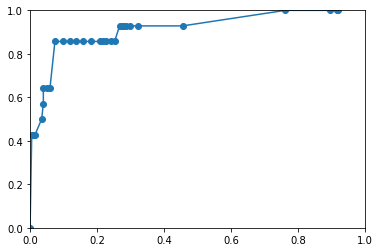

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr, '-o')
plt.axis([0, 1, 0, 1])
plt.show()

In [75]:
a = 1 - fpr[-1]
for i in range(len(fpr)):
    if i == 0:
        pass
    else:
        a += tpr[i - 1] * (fpr[i] - fpr[i - 1])
a

0.9002828854314002

In [ ]:
56/1000


In [2]:
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from gcn_utils import collate
from utils import get_data
from tqdm import tqdm

train_data = get_data_for_mlp('train_cv/fold_0/train.csv', device='cuda:0')
dev_data = get_data_for_mlp('train_cv/fold_0/dev.csv', device='cuda:0')
data_loader = DataLoader(train_data, batch_size=32, shuffle=True)
_dev_data_loader = DataLoader(dev_data, batch_size=32, shuffle=False)

Reading raw data ... : : 1694it [00:05, 312.80it/s]
Reading raw data ... : : 202it [00:00, 374.38it/s]


In [3]:
model = MLP(27 + 1, 16, 48, 2, 3, 0.1)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda:0')
model.to(device)


MLP(
  (element_emebdding): Embedding(28, 16, padding_idx=0)
  (layers): ModuleList(
    (0): Linear(in_features=16, out_features=48, bias=True)
    (1): Linear(in_features=48, out_features=48, bias=True)
    (2): Linear(in_features=48, out_features=48, bias=True)
  )
  (out): Linear(in_features=48, out_features=2, bias=True)
  (dropout): Dropout(p=0.1)
)

In [4]:
[train_data[0][0].size() for i in range(len(train_data))]

[torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),
 torch.Size([100]),


In [5]:
train_data[0]

(tensor([5, 1, 3, 1, 3, 5, 5, 3, 5, 5, 3, 5, 3, 5, 5, 5, 3, 5, 3, 5, 5, 3, 5, 5,
         3, 5, 3, 5, 3, 5, 5, 3, 5, 5, 3, 5, 3, 5, 5, 3, 5, 1, 5, 3, 5, 5, 3, 5,
         5, 3, 3, 5, 5, 5, 3, 5, 3, 5, 5, 3, 5, 5, 3, 3, 5, 5, 5, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0], device='cuda:0'),
 tensor(0, device='cuda:0'),
 tensor(67., device='cuda:0'))

In [6]:
for epoch in range(80):
    model.train()
    epoch_loss = 0
    batch = tqdm(data_loader)
    for elem, label, lengths in batch:
        optimizer.zero_grad()
        prediction = model(elem, lengths)
        loss = torch.mean(F.cross_entropy(prediction, label, reduction='none')
                         * (torch.ones_like(label, dtype=torch.float, device=device) +
                            torch.tensor(label.clone().detach(), dtype=torch.float, device=device) * 10))

        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
        batch.set_description(f'epoch {epoch} loss {epoch_loss}')
    # if epoch > 10:
    #     print(F.softmax(prediction.detach()).cpu())
    #     print(label.cpu())

    if epoch % 10 == 9:
        model.eval()
        epoch_loss = 0
        dev_batch = tqdm(_dev_data_loader)
        all_pred = []
        all_label = []
        with torch.no_grad():
            for elem, label, lengths in dev_batch:
                prediction = model(elem, lengths)
                loss = torch.mean(F.cross_entropy(prediction, label, reduction='none')
                                  * (torch.ones_like(label, dtype=torch.float, device=device) +
                                     torch.tensor(label.clone().detach(), dtype=torch.float, device=device) * 10))

                all_pred.append(F.softmax(prediction.clone().detach()))
                all_label.append(label.clone().detach())
                epoch_loss += loss.item()
                dev_batch.set_description(f'-DEV- epoch {epoch} loss {epoch_loss}')

  0%|                                                                                           | 0/53 [00:00<?, ?it/s]C:\Users\Yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
  0%|                                                                                            | 0/7 [00:00<?, ?it/s]C:\Users\Yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
C:\Users\Yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Implicit dimension choice f

-DEV- epoch 79 loss 6.794012695550919: 100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 280.74it/s]


In [7]:
fpr = [0]
tpr = [0]
for dec_bound in [0.7,0.5, 0.4, 0.3,0.275, 0.25, 0.2375, 0.225, 0.2,0.175,0.15,0.1375,0.125,0.1125, 0.1,0.095,0.09,0.085, 0.08, 0.075, 0.0725, 0.07125, 0.07, 0.065, 0.06, 0.04, 0.02, 0.01, 0.005, 0.0025, 0.00125, 0.000675, 0.00035, 0.000002]:
    t_p = []
    all_p = []
    f_p = []
    all_ins = []
    for pred, label in zip(all_pred, all_label):
        label_pred = pred.clone().detach()[:, 1] >= dec_bound * torch.ones_like(pred.clone().detach()[:, 1])
        # v, idx = torch.max(pred , dim=1)
        # print(idx)
        label_pred = (torch.tensor(label_pred.clone().detach(), dtype=torch.long, device=device))
        # print(label)
        t_p.append(sum(torch.tensor(label_pred == label, dtype=torch.long, device=device) * label).item())
        f_p.append(sum(torch.tensor(label_pred != label, dtype=torch.long, device=device) * torch.tensor(label == 0, dtype=torch.long, device=device)).item())

        all_p.append(sum(label).item())
        all_ins.append([*label.size()][0])

    print(f'{dec_bound} {sum(f_p)/sum(all_ins)} {sum(t_p)/sum(all_p)}')
    print()
    fpr.append(sum(f_p)/sum(all_ins))
    tpr.append(sum(t_p)/sum(all_p))
    # sum(all_ins)

C:\Users\Yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
C:\Users\Yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
C:\Users\Yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app


0.7 0.01485148514851485 0.42857142857142855

0.5 0.034653465346534656 0.42857142857142855

0.4 0.04455445544554455 0.5

0.3 0.0594059405940594 0.5714285714285714

0.275 0.06435643564356436 0.5714285714285714

0.25 0.06930693069306931 0.6428571428571429

0.2375 0.06930693069306931 0.7142857142857143

0.225 0.07920792079207921 0.7142857142857143

0.2 0.09900990099009901 0.8571428571428571

0.175 0.12376237623762376 0.8571428571428571

0.15 0.17326732673267325 0.8571428571428571

0.1375 0.1782178217821782 0.8571428571428571

0.125 0.19306930693069307 0.8571428571428571

0.1125 0.2079207920792079 0.8571428571428571

0.1 0.26732673267326734 0.8571428571428571

0.095 0.2722772277227723 0.8571428571428571

0.09 0.28217821782178215 0.9285714285714286

0.085 0.3118811881188119 0.9285714285714286

0.08 0.33663366336633666 0.9285714285714286

0.075 0.35148514851485146 0.9285714285714286

0.0725 0.3613861386138614 0.9285714285714286

0.07125 0.3712871287128713 0.9285714285714286

0.07 0.3762376237

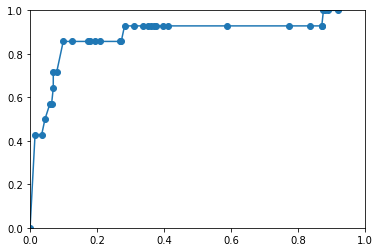

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr, '-o')
plt.axis([0, 1, 0, 1])
plt.show()

In [9]:
a = 1 - fpr[-1]
for i in range(len(fpr)):
    if i == 0:
        pass
    else:
        a += tpr[i - 1] * (fpr[i] - fpr[i - 1])
a

0.8794200848656294